In [41]:
from scipy.stats import dirichlet, beta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
K = 3 # number of classes

We model our probabilities as a vector with $K$ components, 

$$\mathbf{p} \sim \mathrm{Dirichlet}(K, \mathbf{\alpha})$$

where $\mathbf{\alpha}$ is a vector of hyperparameters, each $\alpha_i > 0$.

* A uniform prior is $\alpha_i \equiv 1$. 
* We may build a better prior by looking at the whole population and estimating (by eye) parameters for $\alpha$ which fit well the distribution

Let us assume for now a prior which is symmetric (all $\alpha_i$ equal); a uniform prior works, but we could have any other one. For example:

In [43]:
alpha_prior = 2*np.ones(3) # must be numpy array

In [44]:
dirichlet.mean(alpha_prior) 

array([0.33333333, 0.33333333, 0.33333333])

With this prior, we don't favor any classes; everything is $1/K$

Now assume we observed 2 instances of class 1, 1 instance of class 2, and no instance of class 3.

In [46]:
observations = [2, 1, 0]

In [47]:
new_alpha = alpha_prior + observations

In [51]:
# new estimate probabilities: means: p(1), p(2), p(3)
dirichlet.mean(new_alpha).round(2)

array([0.44, 0.33, 0.22])

In [52]:
# standard deviations: let's make it sqrt(var)
np.sqrt(dirichlet.var(new_alpha)).round(2)

array([0.16, 0.15, 0.13])

We can also view each marginal PDF by itself:
    
If $\mathbf{p} \sim \mathrm{Dirichlet}(K, \mathbf{\alpha})$, let $$|\alpha| := \sum_{i=1}^K \alpha_i.$$

Then 

$$X_i \sim \mathrm{Beta}(\alpha_i, |\alpha| - \alpha_i)$$

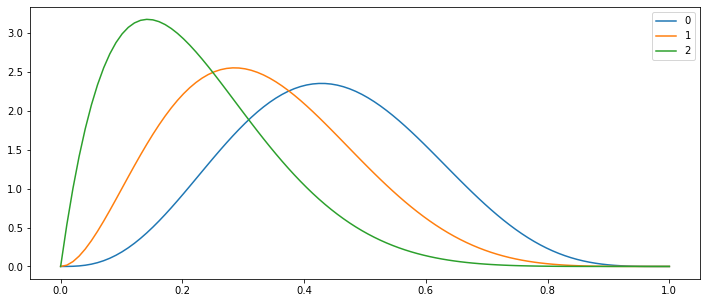

In [54]:
x = np.linspace(0,1,100)
fig, ax = plt.subplots(figsize=(12, 5))

abs_alpha = new_alpha.sum()
for i in range(K):
    ax.plot(x, beta.pdf(x, new_alpha[i], abs_alpha-new_alpha[i]), label=str(i))

plt.legend()
plt.show()

Notice however that **the variables are not independent!**

If $i\neq j$,

$$\mathrm{Cov}[X_i, X_j] = - \frac{\alpha_i \alpha_j}{|\alpha|^2 (1 + |\alpha|)}$$

In [81]:
obs = dirichlet.rvs(new_alpha, size=10000)

In [82]:
cov = np.corrcoef(obs.T)

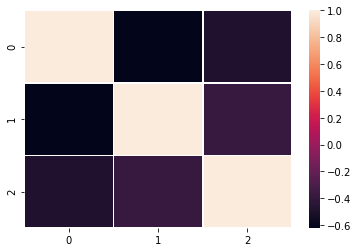

In [83]:
import seaborn as sns

ax = sns.heatmap(cov, linewidth=0.5)
plt.show()